In [1]:
from glob import glob
import os
import SimpleITK as sitk
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

datapath = '/meddat/backup/covid_challenge_eu/synthetic_data'

CT_paths = glob(os.path.join(datapath, "*_vol.nii.gz"))
Mask_paths = glob(os.path.join(datapath, "*_labels.nii.gz"))

CT_paths = sorted(CT_paths)
Mask_paths = sorted(Mask_paths)

print('ct_path: ', CT_paths[0])
print('Mask_path: ', Mask_paths[0])

assert len(Mask_paths) == len(CT_paths), "Unequal number of CTs and Masks"
# #%%
# cts = [sitk.ReadImage(ct_path) for ct_path in CT_paths]
# masks = [sitk.ReadImage(mask_path) for mask_path in Mask_paths]

# print('cts[0].shape: ', cts[0].shape)
# print('masks[0].shape: ', masks[0].shape)

('ct_path: ', '/meddat/backup/covid_challenge_eu/synthetic_data/0547e66cc6_vol.nii.gz')
('Mask_path: ', '/meddat/backup/covid_challenge_eu/synthetic_data/0547e66cc6_labels.nii.gz')


In [2]:
from utils import get_dataset_stats, dump_data, pl_get_dataset_stats
from utils import plot_hist, collect_hu_values, get_nonzero_voxel_count
from multiprocessing import Pool
from functools import partial
from data import Data

img_size, img_res, img_area = get_dataset_stats(CT_paths=CT_paths, \
                            Mask_paths=Mask_paths)

# #%%

# pool = Pool()

# N = dt.num_scans
# partial_data_stats = partial(pl_get_dataset_stats, data=dt)
# _ = pool.map(partial_data_stats, range(N))

# pool.close()
# pool.join()

100%|██████████| 96/96 [05:02<00:00,  3.15s/it]


In [3]:
dt = Data(CT_paths, Mask_paths)
dt.img_size = img_size
dt.img_res = img_res
dt.img_area = img_area

In [4]:
dump_data(img_size, img_res, img_area, CT_paths,'./preprocess')


Dumping results: 100%|██████████| 96/96 [00:00<00:00, 55423.70it/s]('Dataset stats written to ', './preprocess/data_summary.csv')



In [5]:
all_hu_vals, slice_count_all = collect_hu_values(dt)

Processing all masks: 100%|██████████| 96/96 [01:38<00:00,  1.03s/it]


==== Original HU Stats ====
len:  1049909283
min HU: -1721.0
max HU: 3011.0
median HU: -836.0


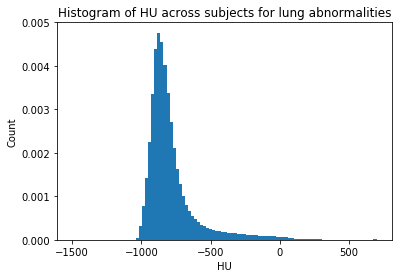

In [6]:

temp_hu_vals = deepcopy(all_hu_vals)
temp_hu_vals[temp_hu_vals < -1500] = -1500
temp_hu_vals[temp_hu_vals > 700] = 700

print '==== Original HU Stats ===='
print 'len: ', len(all_hu_vals)
print 'min HU: ',np.min(all_hu_vals)
print 'max HU: ',np.max(all_hu_vals)
print 'median HU: ',np.median(all_hu_vals) #it can take time - as worst case is O(n^2) | remember qsort to find kth smallest elem
print '==========================='

plot_hist(temp_hu_vals, \
    title='Histogram of HU across subjects for lung abnormalities', \
        x_label='HU', y_label='Count', n_bins=100)


In [7]:
counts = get_nonzero_voxel_count(slice_count_all, thresh=0)


In [8]:
counts

[43L,
 48L,
 141L,
 196L,
 253L,
 352L,
 424L,
 482L,
 568L,
 935L,
 1824L,
 2466L,
 3155L,
 3689L,
 4479L,
 5496L,
 6592L,
 7724L,
 8654L,
 9503L,
 10021L,
 10859L,
 11618L,
 12459L,
 13132L,
 14231L,
 15298L,
 16451L,
 17608L,
 19444L,
 21180L,
 22536L,
 24033L,
 25489L,
 27138L,
 28906L,
 30556L,
 31796L,
 32958L,
 35026L,
 36939L,
 38820L,
 41240L,
 43869L,
 46291L,
 48358L,
 51334L,
 54067L,
 56765L,
 60106L,
 63830L,
 66441L,
 70339L,
 73933L,
 76466L,
 78293L,
 79523L,
 81155L,
 82360L,
 82366L,
 83002L,
 82574L,
 83255L,
 84500L,
 85510L,
 85664L,
 86464L,
 86459L,
 85867L,
 87039L,
 88624L,
 90499L,
 93297L,
 94759L,
 95108L,
 95820L,
 95619L,
 95740L,
 95608L,
 96257L,
 97132L,
 97941L,
 100434L,
 102710L,
 104031L,
 105373L,
 106187L,
 106645L,
 106815L,
 107792L,
 110452L,
 113455L,
 117459L,
 122333L,
 127126L,
 131185L,
 136132L,
 139773L,
 145359L,
 151957L,
 158443L,
 162848L,
 166989L,
 169825L,
 173272L,
 174392L,
 174151L,
 173930L,
 175349L,
 176784L,
 176207L,
 177

In [9]:
len(counts)

28341

In [10]:
np.min(counts)

1

In [11]:
np.max(counts)

261609

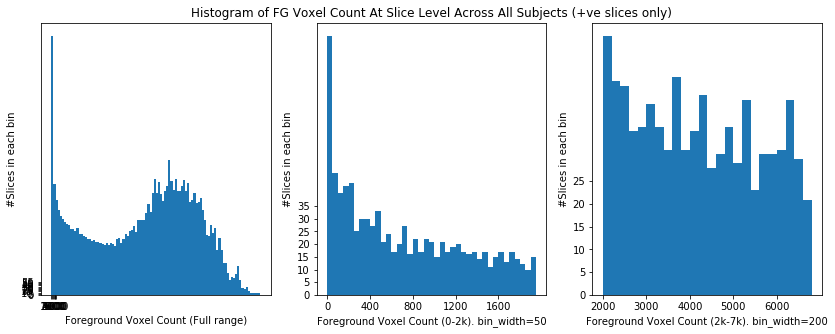

In [12]:
# Plotting diff histograms
fig, ax = plt.subplots(1,3)
bin_edges = np.hstack((np.arange(0,2000,50), np.arange(2000,7000,200)))
hist = ax[0].hist(counts, bins=100)
ax[0].set_xlabel('Foreground Voxel Count (Full range)')
ax[0].set_ylabel('#Slices in each bin')
ax[0].set_xticks(np.arange(0,7000,1000))
ax[0].set_yticks(np.arange(0,60,5))
# At two limited levels of granularity - first half
ax[1].hist(counts, bins=np.arange(0,2000,50))
ax[1].set_xlabel('Foreground Voxel Count (0-2k). bin_width=50')
ax[1].set_ylabel('#Slices in each bin')
ax[1].set_title('Histogram of FG Voxel Count At Slice Level Across All Subjects (+ve slices only)')
ax[1].set_xticks(np.arange(0,2000,400))
ax[1].set_yticks(np.arange(0,40,5))
# At two limited levels of granularity - second half
ax[2].hist(counts, bins=np.arange(2000,7000,200))
ax[2].set_xlabel('Foreground Voxel Count (2k-7k). bin_width=200')
ax[2].set_ylabel('#Slices in each bin')
ax[2].set_xticks(np.arange(2000,7000,1000))
ax[2].set_yticks(np.arange(0,30,5))
# Now we look at the number of slices per subject above a certain count threshold
# fig = plt.gcf()
fig.set_size_inches(14,5)